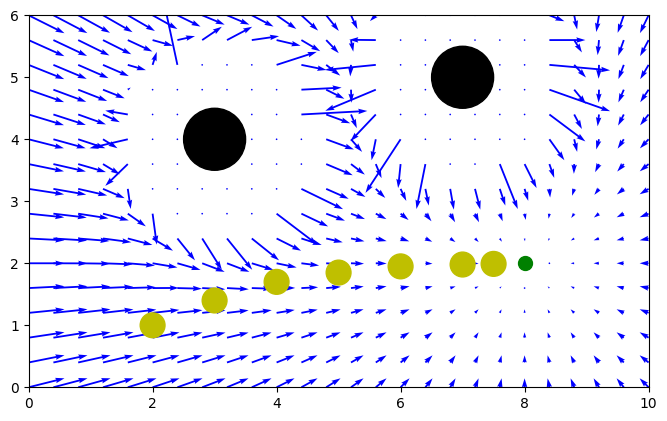

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

WORLDX, WORLDY = 10, 6

def att_force(q, goal, katt=.01):
  return katt*(goal - q)

goal = np.array([8, 2])

fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

XX, YY = np.meshgrid(np.arange(0, WORLDX+.4, .4), np.arange(0, WORLDY+.4, .4))
XY = np.dstack([XX, YY]).reshape(-1, 2)

Fatt = att_force(XY, goal)
Fatt_x = Fatt[:,0]
Fatt_y = Fatt[:,1]

def rep_force(q, obs, R=3, krep=.1):
  v = q - obs[0:2]
  d = np.linalg.norm(v, axis=1) - obs[2]
  d = d.reshape((len(v), 1))

  rep = (1/d**2)*((1/d)-(1/R))*(v/d)

  invalid = np.squeeze(d > R)
  rep[invalid, :] = 0

  return krep*rep

def rob_position(posx, posy):
  rob = np.array([posx, posy, .2])
  ax.add_patch(patches.Circle((rob[0], rob[1]), rob[2], color='y'))

obs1 = np.array([3, 4, .5])
obs2 = np.array([7, 5, .5])

Frep1 = rep_force(XY, obs1)
Frep1_x = np.copy(Frep1[:,0])
Frep1_y = np.copy(Frep1[:,1])

Frep2 = rep_force(XY, obs2)
Frep2_x = np.copy(Frep2[:,0])
Frep2_y = np.copy(Frep2[:,1])

Ft = Fatt + Frep1 + Frep2

Ft_x = Ft[:,0]
Ft_y = Ft[:,1]

fmax = .15
Fm = np.linalg.norm(Ft, axis=1)
Ft_x[Fm > fmax], Ft_y[Fm > fmax] = 0, 0

ax.quiver(XX, YY, Ft_x, Ft_y, color='b')
plt.plot(goal[0], goal[1], 'og', markersize=10)
ax.add_patch(patches.Circle((obs1[0], obs1[1]), obs1[2], color='k'))
ax.add_patch(patches.Circle((obs2[0], obs2[1]), obs2[2], color='k'))

ax.set_xlim(0, WORLDX)
ax.set_ylim(0, WORLDY)

rob = np.array([2, 1, .2])
ax.add_patch(patches.Circle((rob[0], rob[1]), rob[2], color='y'))
rob_position(3, 1.4)
rob_position(4, 1.7)
rob_position(5, 1.85)
rob_position(6, 1.95)
rob_position(7, 1.98)
rob_position(7.5, 1.99)